<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/HM_Random_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handling Missing Data Using Random Numbers (Random Imputation)

Handling missing data using random numbers, often referred to as random imputation, is a method where missing values are replaced with randomly selected values from the observed data for that variable. While it might seem intuitive, it's generally **not recommended** for most statistical analyses or machine learning tasks due to several significant drawbacks.

Here's a breakdown of how it works, its motivations, and why it's usually avoided:

#### How it works:

1.  **Identify Missing Values:** First, you identify the cells in your dataset that contain missing values (e.g., `NaN`, `null`).
2.  **Select Observed Values:** For each variable with missing values, you gather all the existing, non-missing values.
3.  **Random Selection:** For each missing value in that variable, you randomly pick one of the observed values from step 2 and use it as a replacement.

#### Motivations (and why they're often flawed):

*   **Simplicity and Ease of Implementation:** It's very straightforward to code and understand.
*   **Preserves Mean (Sometimes):** If the random sampling is done with replacement from the observed data, the mean of the variable might be approximately preserved, especially with large datasets.
*   **Preserves Variance (Incorrectly):** The idea is that by introducing randomness, you preserve some of the original variance of the data. However, as we'll see, it often distorts the true variance and relationships.

#### Why it's generally NOT recommended:

1.  **Distorts Relationships between Variables:** This is the most critical issue. Randomly imputing values for one variable without considering its relationship to other variables can significantly weaken or even create spurious correlations. For example, if 'income' is missing and you randomly impute it, you lose any potential correlation between 'income' and 'education level', even if a strong one exists in the observed data.
2.  **Underestimates Standard Errors and Overestimates Statistical Significance:** By adding random noise that doesn't reflect the true underlying data generation process, you effectively reduce the uncertainty around your estimates. This can lead to narrower confidence intervals and lower p-values, making you incorrectly believe your findings are more statistically significant than they truly are.
3.  **Biases Estimates (especially for small datasets or non-random missingness):** If the missingness is not completely random (e.g., people with lower incomes are more likely to not report their income), random imputation can introduce significant bias into your estimates.
4.  **Doesn't Account for Uncertainty of Imputation:** Random imputation treats the imputed values as if they were truly observed, ignoring the fact that they are just guesses. This leads to an underestimation of uncertainty.
5.  **Less Robust than Other Methods:** More sophisticated methods like multiple imputation or model-based imputation explicitly model the missing data process and the relationships between variables, providing more accurate and reliable results.

#### When might it be (very rarely) considered?

*   **Purely for Exploratory Analysis/Quick Visualization:** In very early stages of exploration, if you just need to get *some* value in a column to make a plot work and you understand the severe limitations, you *might* use it. But even then, better alternatives exist.
*   **As a Baseline Comparison:** Sometimes, it might be used as a very simple baseline against which more complex imputation methods are compared to demonstrate their superiority.

#### Better Alternatives:

Instead of random imputation, consider these more robust methods:

*   **Mean/Median/Mode Imputation:** Replacing missing values with the mean, median, or mode of the observed data. While simple, it has fewer negative consequences than random imputation on variable relationships, though it still reduces variance.
*   **Hot-Deck Imputation:** Imputing missing values by borrowing values from similar records (nearest neighbors).
*   **Regression Imputation:** Predicting missing values based on other variables in the dataset using a regression model.
*   **Multiple Imputation by Chained Equations (MICE):** This is generally considered one of the best approaches. It creates multiple complete datasets by imputing missing values several times, accounting for the uncertainty of imputation, and then combining the results.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [143]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [144]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [145]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [146]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [149]:
X_test

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250
...,...,...
89,24.0,8.0500
80,22.0,9.0000
846,NaN,69.5500
870,26.0,7.8958


In [150]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [151]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [152]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [153]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [154]:
X_train['Age_imputed'][X_train['Age'].isnull()]

,Age_imputed
77,NaN
868,NaN
334,NaN
295,NaN
792,NaN
...,...
674,NaN
466,NaN
584,NaN
527,NaN


In [155]:
X_train['Age_imputed'][X_train['Age'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipython-input-2751985975.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipython-input-2751985975.py:2: Future

The two lines of code above perform **random imputation** for the 'Age' column in both the training (`X_train`) and testing (`X_test`) datasets.

Let's break down the first line:
`X_train['Age_imputed'][X_train['Age'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values`

1.  `X_train['Age'].isnull()`: This creates a boolean mask, identifying all the rows in the original 'Age' column of the training set (`X_train`) that have missing values (`NaN`).
2.  `X_train['Age'].dropna()`: This selects all the *non-missing* 'Age' values from the training set. These are the values from which we will draw our random replacements.
3.  `X_train['Age'].isnull().sum()`: This calculates the *count* of missing 'Age' values in the training set. This count determines how many random values we need to sample.
4.  `.sample(...)`: This takes a random sample from the `dropna()` set (the observed ages). The size of this sample is equal to the number of missing values calculated in the previous step.
5.  `.values`: This converts the sampled pandas Series into a NumPy array, which is then used for assignment.
6.  `X_train['Age_imputed'][X_train['Age'].isnull()] = ...`: Finally, the randomly sampled values are assigned to the `Age_imputed` column specifically at the positions where the original 'Age' had missing values.

The second line for `X_test` (`X_test['Age_imputed'][X_test['Age'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values`) performs the exact same process for the testing dataset.

In [156]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,35.0
493,71.0,49.5042,71.0
527,NaN,221.7792,59.0


In [157]:
X_train['Age_imputed'].isnull().sum()

np.int64(0)

In [158]:
X_test['Age_imputed'].isnull().sum()

np.int64(0)

In [159]:
X_train['Age_imputed']

,Age_imputed
30,40.0
10,4.0
873,47.0
182,9.0
876,20.0
...,...
534,30.0
584,35.0
493,71.0
527,59.0


In [160]:
X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

array([57. , 40. , 23. , 54. , 42. , 37. , 42. , 20. , 38. , 25. , 17. ,
       36. , 40. , 16. , 25. , 37. ,  7. , 33. , 10. , 24. , 31. , 32. ,
       38. , 24. , 32.5, 21. , 34. , 38. , 36. ])

In [161]:
X_test['Age']

,Age
707,42.0
37,21.0
615,24.0
169,28.0
68,17.0
...,...
89,24.0
80,22.0
846,NaN
870,26.0


In [162]:
X_train['Age_imputed'][X_train['Age'].isnull()]

,Age_imputed
77,19.0
868,22.0
334,25.0
295,44.0
792,22.0
...,...
674,45.0
466,35.0
584,35.0
527,59.0


In [163]:
X_train['Age'].isnull().sum()

np.int64(148)

/tmp/ipython-input-1812605532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original')
/tmp/ipython-input-1812605532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label='Imputed')


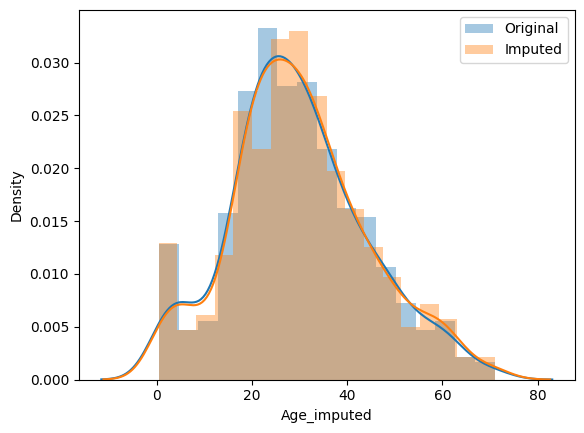

In [164]:
sns.distplot(X_train['Age'],label='Original')
sns.distplot(X_train['Age_imputed'],label='Imputed')
plt.legend()

/tmp/ipython-input-305184591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/tmp/ipython-input-305184591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)


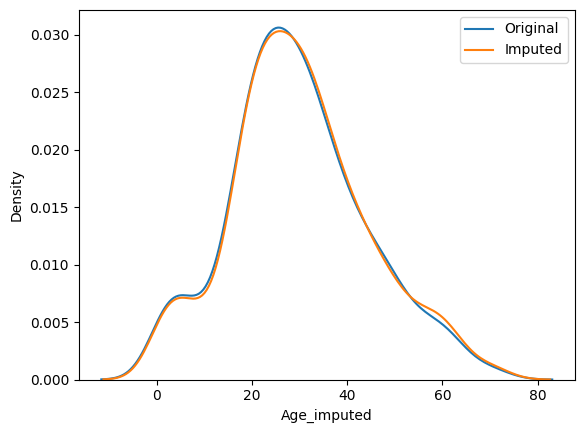

In [165]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()

In [166]:
print("Original variable variance",X_train['Age'].var())
print("variance after random imputation",X_train['Age_imputed'].var())

Original variable variance 204.3495133904614
variance after random imputation 208.06025943658227


In [167]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,61.363261
Age,71.512440,204.349513,204.349513
Age_imputed,61.363261,204.349513,208.060259


<Axes: >

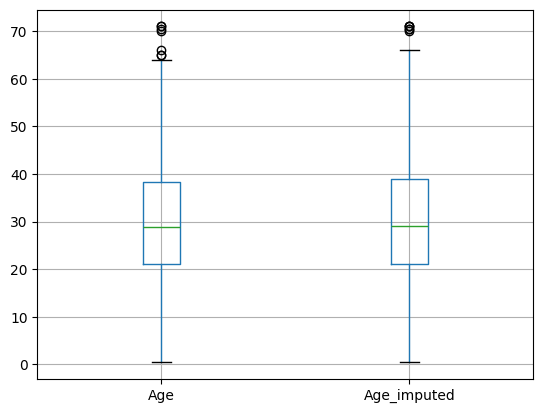

In [168]:
X_train[['Age','Age_imputed']].boxplot()

In [169]:
observation = X_train.iloc[0]
sampled_values=X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

#Another Dataset to perform operations on it

In [170]:
df1=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [171]:
df_temp = pd.read_csv('train.csv')
print(df_temp.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [172]:
df1

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [173]:
df1.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [174]:
X = df1
y = df1['SalePrice']

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [177]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1088,NaN,TA,137500,TA,NaN
1386,TA,TA,250000,TA,TA
1323,NaN,NaN,82500,NaN,NaN
85,TA,TA,260000,TA,TA
1096,NaN,NaN,127000,NaN,NaN


In [178]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample

/tmp/ipython-input-689570953.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values

In [179]:
temp=pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],
    axis=1
)
temp.columns=['Original','Imputed']
temp

,Original,Imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [180]:
temp=pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
    ],
    axis=1
)
temp.columns=['Original','Imputed']
temp

,Original,Imputed
Gd,0.494272,0.492295
TA,0.412439,0.415240
Fa,0.040917,0.039384
Po,0.027823,0.029110
Ex,0.024550,0.023973


/tmp/ipython-input-3231478181.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-3231478181.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


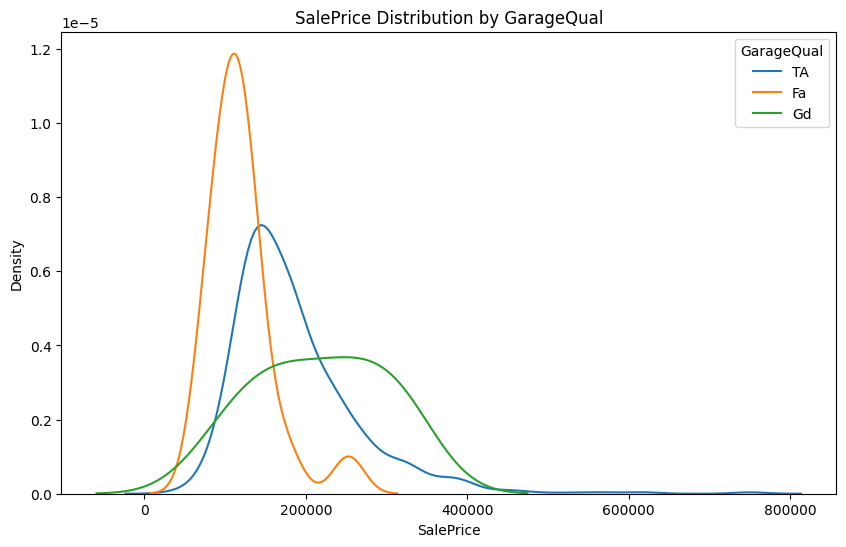

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in X_train['GarageQual'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['GarageQual'] == category],
        x='SalePrice',
        label=category
    )

plt.title('SalePrice Distribution by GarageQual')
plt.legend(title='GarageQual')
plt.show()


/tmp/ipython-input-4207921046.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-4207921046.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


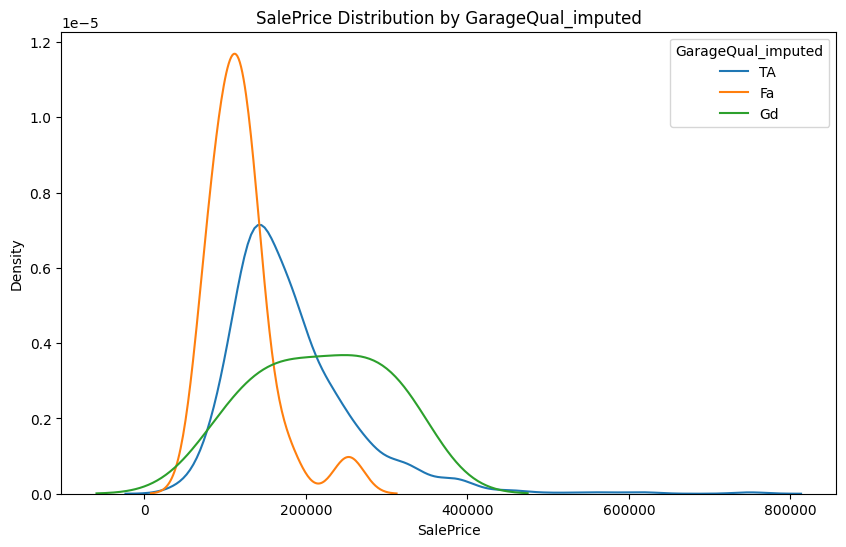

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in X_train['GarageQual_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['GarageQual_imputed'] == category],
        x='SalePrice',
        label=category
    )

plt.title('SalePrice Distribution by GarageQual_imputed')
plt.legend(title='GarageQual_imputed')
plt.show()


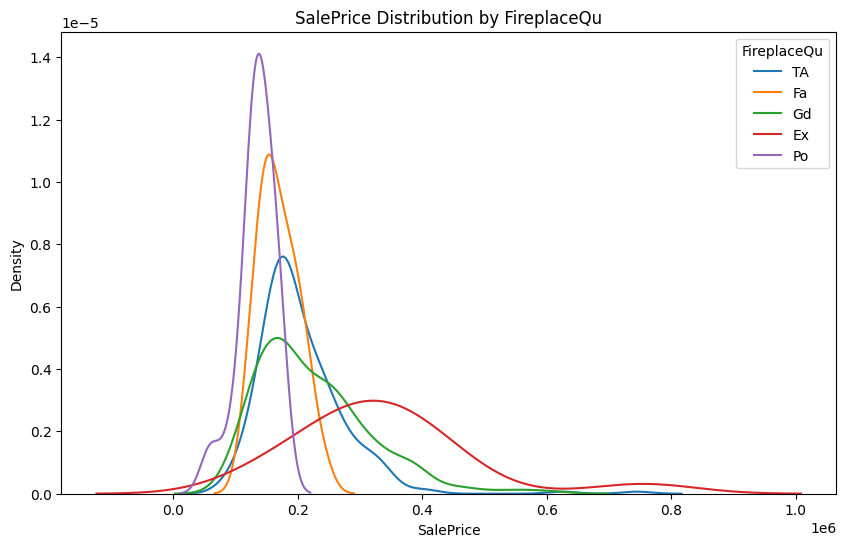

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu'] == category],
        x='SalePrice',
        label=category
    )

plt.title('SalePrice Distribution by FireplaceQu')
plt.legend(title='FireplaceQu')
plt.show()


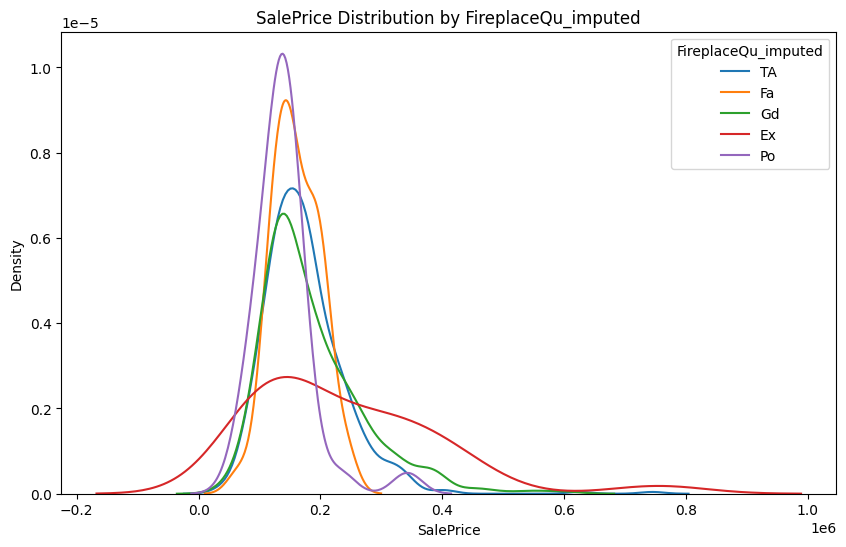

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu_imputed'] == category],
        x='SalePrice',
        label=category
    )

plt.title('SalePrice Distribution by FireplaceQu_imputed')
plt.legend(title='FireplaceQu_imputed')
plt.show()


##Using Missing Indicators

In [185]:
df2=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [186]:
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [187]:
X=df2.drop(columns=['Survived'])
y=df2['Survived']

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [189]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [190]:
si=SimpleImputer()
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [191]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [192]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [194]:
mi=MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [195]:
X_train_missing=mi.transform(X_train)

In [196]:
X_test_missing=mi.transform(X_test)

In [197]:
mi.features_

array([0])

In [198]:
X_train['Age_NA']=X_train_missing
X_test['Age_NA']=X_test_missing

In [199]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [201]:
X_test

,Age,Fare,Age_NA
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False
...,...,...,...
89,24.0,8.0500,False
80,22.0,9.0000,False
846,NaN,69.5500,True
870,26.0,7.8958,False


In [202]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [203]:
si=SimpleImputer()
X_train_trf2=si.fit_transform(X_train)
X_test_trf2=si.transform(X_test)

In [204]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf2,y_train)
y_pred=clf.predict(X_test_trf2)

accuracy_score(y_test,y_pred)

0.6312849162011173

In [205]:
si=SimpleImputer(add_indicator=True)
X_train=si.fit_transform(X_train)
X_test=si.transform(X_test)

In [206]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf2,y_train)
y_pred=clf.predict(X_test_trf2)

accuracy_score(y_test,y_pred)


0.6312849162011173